# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("telecom_users.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# Графы 'Unnamed: 0' и 'customerID' никак не влияют на отток клиентов, поэтому их можно удалить.

df.drop(columns=['Unnamed: 0', 'customerID'], axis=1, inplace=True)

In [4]:
# Видно, что пропущенных значений нет. Однако, графа "TotalCharges", содержащая по виду числовые значения, имеет тип Object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [5]:
# Как видно, категориальные данные имеют 2-4 значения

df.describe(include=np.object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


In [6]:
df.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
# Проверим, почему графа 'TotalCharges' не числовая - что в ней содержится кроме чисел, десятичных или целых
df[~df['TotalCharges'].str.match('^\d*\.?\d*$')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [8]:
df.loc[356, 'TotalCharges']

' '

In [9]:
# Значение TotalCharges отсутствует у пользователей со сроком менее месяца. Эти записи не дают полезной информации, их можно удалить
df.drop(df[df['TotalCharges'] == ' '].index, inplace=True)

In [10]:
# Преобразуем TotalCharges к типу float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
# Создадим второй датасет, состоящий из фиктивных признаков-индикаторов
df2 = pd.get_dummies(df)

# 2. Исследование зависимостей и формулирование гипотез

In [12]:
# Выделим группы свойств: социальные, подписки на сервисы и виды платежей
social_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

In [13]:
def countplot_stat(data, features, hue=None, n_cols=5):
    """
    Plot countplots for given columns in dataset by given number of columns
    """
    n_cols = min(n_cols, len(features))
    n_rows = int(np.ceil(len(features) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
    for ax, feat in zip(axes.flatten(), features):
        sns.countplot(x=feat, hue=hue, data=data, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
        plt.tight_layout()

    plt.show()

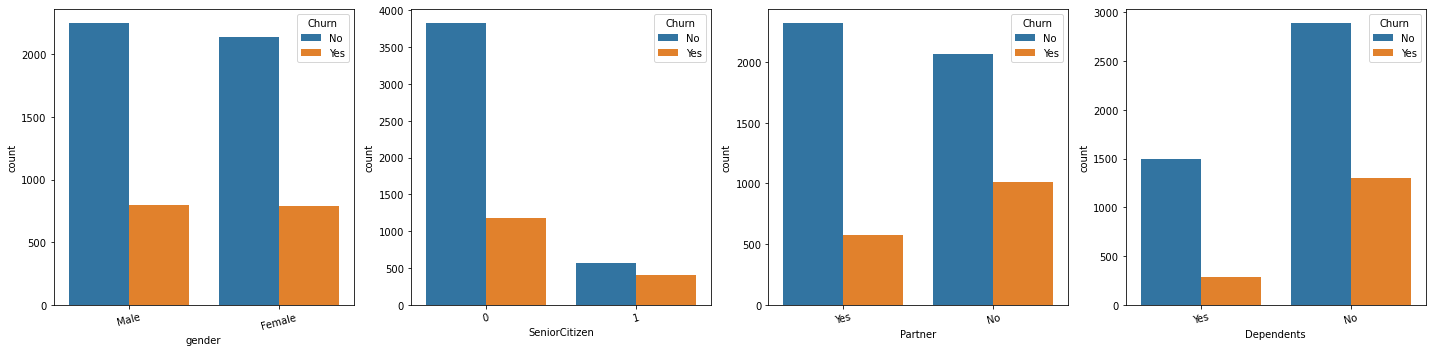

In [14]:
# Строим столбчатые графики распределения ушедших/оставшихся для социальных признаков

countplot_stat(df, social_features, hue='Churn')

Из графиков выше можно сделать выводы, что пол клиента слабо влияет на отток.
<br>Хотя общее количество ушедших больше среди людей, не являющихся пенсионерами, процент ушедших среди пенсионеров выше.
<br>И общее количество, и доля ушедших выше среди людей, не состоящих в браке и не имеющих иждивенцев.
<br>В общем, свойства, за исключением пола, оказывают влияние на отток.

In [15]:
# Бинарные данные заменим на 1 и 0
df[['Partner', 'Dependents']] = df[['Partner', 'Dependents']]\
    .stack().map({'Yes': 1, 'No': 0}).unstack()

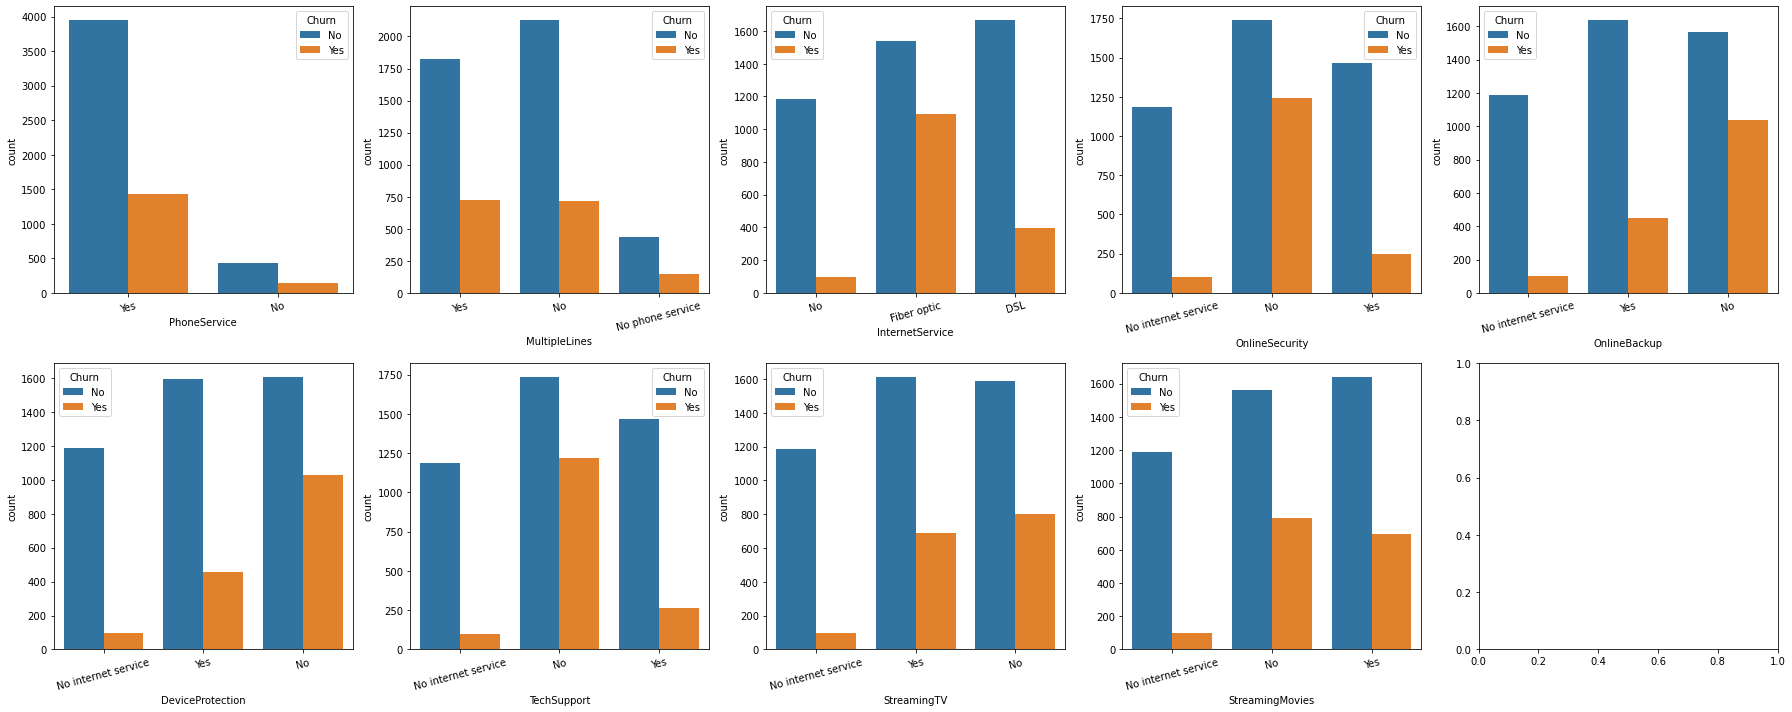

In [16]:
# Строим столбчатые графики распределения ушедших/оставшихся для признаков подключенных сервисов

countplot_stat(df, service_features, hue='Churn')

Из подключенных опций можно отметить высокий уровень оттока у пользователей, имеющих подключение Fiber Optic и не имеющих подключенных опций онлайн-безопасности, резервного копирования, защиты устройства и технической поддержки.

In [17]:
# Бинарный признак PhoneService заменим на 1 и 0

df[['PhoneService']] = df[['PhoneService']]\
    .stack().map({'Yes': 1, 'No': 0}).unstack()

# Добавим несколько признаков на основе подключенных опций

df['is_fiber_optic'] = df['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)
df['no_internet_service'] = df['InternetService'].apply(lambda x: 1 if x == 'No' else 0)
df['no_online_security'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'No' else 0)
df['no_online_backup'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'No' else 0)
df['no_device_protection'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'No' else 0)
df['no_tech_support'] = df['TechSupport'].apply(lambda x: 1 if x == 'No' else 0)

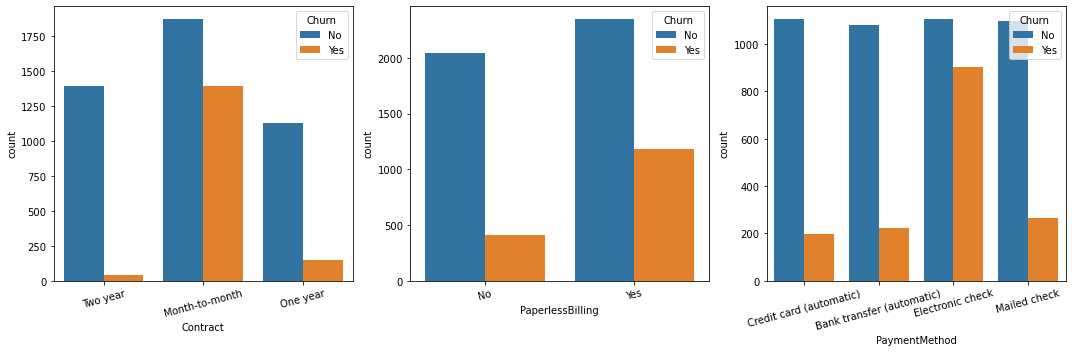

In [18]:
# Строим столбчатые графики распределения ушедших/оставшихся для признаков - свойств аккаунтов

countplot_stat(df, account_features, hue='Churn', n_cols=3)

Пользователи с ежемесячной подпиской склонны к уходу. 
<br>Также больший процент оттока у пользователей с электронными счетами и выписывающими электронные чеки

In [19]:
# Добавим несколько признаков на основе свойств аккаунта

df['monthly_payments'] = df['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 0)
df['electronic_check'] = df['PaymentMethod'].apply(lambda x: 1 if x == 'Electronic check' else 0)

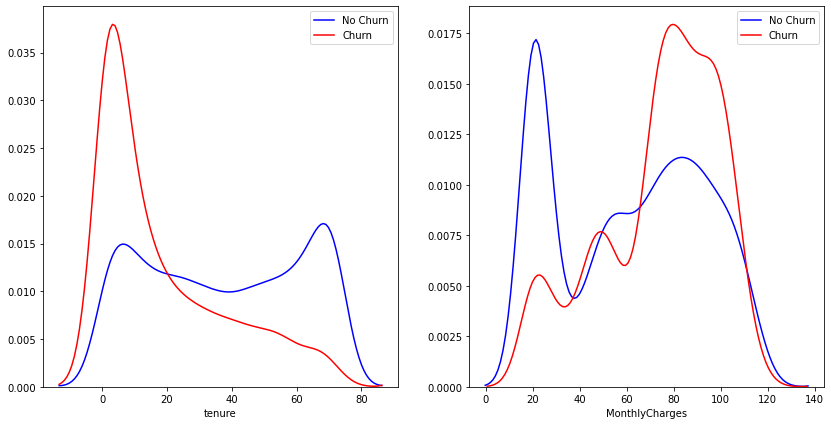

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
for ax, feat in zip(axes.flatten(), ['tenure', 'MonthlyCharges']):
    sns.distplot(df[df['Churn'] == 'No'][feat], hist=False, bins=10, color='b', ax=ax, label='No Churn')
    sns.distplot(df[df['Churn'] == 'Yes'][feat], hist=False, bins=10, color='r', ax=ax, label='Churn')
#     plt.legend()
plt.show()

По графикам распределения сроков подключения и месячных расхдов можно сказать, что риск ухода наиболее высок для аккауном со сроком менее 20 месяцев и расходами более 70 и менее 110 в месяц.

In [21]:
# Создадим бинарные фичи на основе критических сроков и расходов

df['short_tenure'] = df['tenure'].apply(lambda x: 1 if x < 20  else 0)
df['high_charges'] = df['MonthlyCharges'].apply(lambda x: 1 if x > 70 and x < 110 else 0)

In [22]:
# Преобразуем бинарную целевую переменную оттока к числовому виду

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [23]:
# Отберём признаки, влияющие на отток клиентов и создадим датасеты с признаками и целевой переменной
features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'is_fiber_optic', 'no_internet_service', 'no_online_security', 'no_online_backup', 
            'no_device_protection', 'no_tech_support', 'monthly_payments', 'electronic_check', 'short_tenure', 'high_charges']
X = df[features]
y = df['Churn']

In [24]:
# Создадим второй датасет на основе признаков, полученных с использованием get_dummies
X2 = df2.drop(columns=['Churn_No', 'Churn_Yes'])
y2 = df['Churn']

# 3. Построение моделей для прогнозирования оттока

In [25]:
# Импортируем необходимые модули

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from xgboost import XGBClassifier

from sklearn.preprocessing import Normalizer

In [26]:
# Разделим полученные датасеты на тренировочную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=17)

# Поскольку в датасете есть dummy данные, описываемые 0 и 1, 
# и столбцы tenure, MonthlyCharges, TotalCharges
# значения которых измеряются в тысячах, необходимо нормализовать последние, 
# чтобы поместить их в диапазон [0, 1]

scaler = Normalizer()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [27]:
# Определим диапазоны параметров алгоритмов для поиска наилучших при помощи GridSearchCV

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1), 
              'random_state': [17]} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5), 
              'random_state': [17]}

svc_params = {'kernel': ['rbf', 'sigmoid'], # SVC
              'C' : [0.1, 1, 5, 10], 
              'gamma' : [0.01, 0.1, 0.9, 1], 
              'random_state': [17]}

lr_params = {'C': np.arange(0.5, 1, 0.1), # LogisticRegression
             'random_state': [17]}

xgb_params = {'learning_rate' : [0.01, 0.03, 0.05], # GradientBoostingClassifier
              'max_depth' : [1, 4, 6], 
              'n_estimators' : [100, 300, 400, 600, 1000], 
              'random_state': [17]}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [28]:
models = {'gbc': GradientBoostingClassifier(), 
          'rfc': RandomForestClassifier(), 
          'svc': SVC(), 
          'lr': LogisticRegression(),
          'xgb': XGBClassifier()
         }

params = [gbc_params, rfc_params, svc_params, 
          lr_params, xgb_params]

In [29]:
# Создадим цикл для подбора наилучших параметров каждой из моделей по выбранным признакам и
# запишем лучшие параметры в список, а также выведем лучший scor

best_params = {}

for n, (name, model) in enumerate(models.items()):
    clf = GridSearchCV(estimator=model, param_grid=params[n], cv=skf).fit(X_train, y_train)
    best_params[name] = clf.best_params_
    print(f"{str(name)} -- {clf.score(X_test, y_test)}")

gbc -- 0.7876254180602007
rfc -- 0.794314381270903
svc -- 0.794314381270903
lr -- 0.7951505016722408
xgb -- 0.7951505016722408


In [30]:
# Создадим цикл для подбора наилучших параметров каждой из моделей по датасету фиктивных признаков и
# запишем лучшие параметры в список, а также выведем лучший scor

best_params2 = {}

for n, (name, model) in enumerate(models.items()):
    clf = GridSearchCV(estimator=model, param_grid=params[n], cv=skf).fit(X2_train, y2_train)
    best_params2[name] = clf.best_params_
    print(f"{str(name)} -- {clf.score(X2_test, y2_test)}")

gbc -- 0.7968227424749164
rfc -- 0.7993311036789298
svc -- 0.7709030100334449
lr -- 0.7558528428093646
xgb -- 0.8035117056856187


**Можно заметить, что разные модели ведут себя по-разному на разных наборах признаков**<br>
**Сравним 4 модели с наиболее высокими accuracy_score используя ROC-кривую и матрицу ошибок**

# 4. Сравнение качества моделей 

In [65]:
def model_fit_predict(model, params: 'dict', X_train, y_train, X_test, y_test):
    """
    Функция обучает модель с переданными параметрами и выводит значения 
    accuracy_score для тренировочной и тестовой выборок, а также строит
    ROC-кривую и матрицу ошибок
    """
    model = model.set_params(**params)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    acc_score_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_score = metrics.accuracy_score(y_test, y_pred)
    
    print(metrics.classification_report(y_test, y_pred, target_names=['Non-churned', 'Churned']))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics.plot_roc_curve(model, X_test, y_test, ax=axes[0])
    sns.lineplot([0,1], [0,1], ax=axes[0])
    metrics.plot_confusion_matrix(model, X_test, y_test, display_labels= ['Non-churned', 'Churned'], cmap='GnBu', ax=axes[1])

              precision    recall  f1-score   support

 Non-churned       0.83      0.91      0.87       882
     Churned       0.65      0.47      0.55       314

    accuracy                           0.80      1196
   macro avg       0.74      0.69      0.71      1196
weighted avg       0.78      0.80      0.78      1196



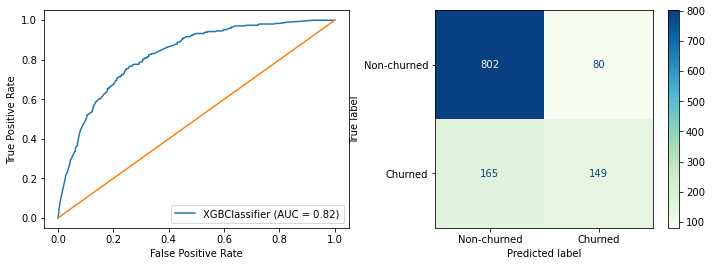

In [66]:
# Модель XGBClassifier, построенная на отобранных вручную признаках

model_fit_predict(models['xgb'], best_params['xgb'], X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

 Non-churned       0.84      0.90      0.87       882
     Churned       0.64      0.51      0.57       314

    accuracy                           0.80      1196
   macro avg       0.74      0.71      0.72      1196
weighted avg       0.79      0.80      0.79      1196



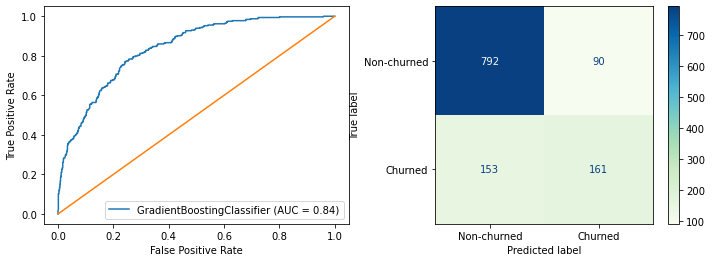

In [67]:
# Модель GradientBoostingClassifier, построенная на датасете, полученном при помощи функции get_dummies

model_fit_predict(models['gbc'], best_params2['gbc'], X2_train, y2_train, X2_test, y2_test)

              precision    recall  f1-score   support

 Non-churned       0.84      0.90      0.87       882
     Churned       0.65      0.50      0.57       314

    accuracy                           0.80      1196
   macro avg       0.74      0.70      0.72      1196
weighted avg       0.79      0.80      0.79      1196



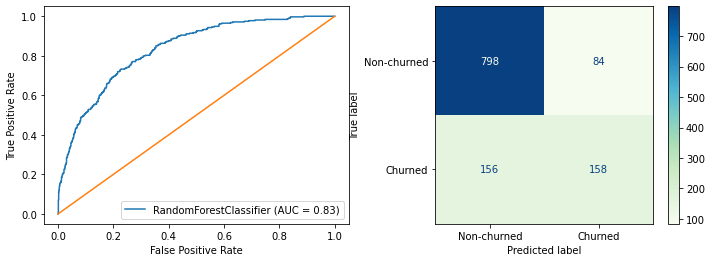

In [68]:
# Модель RandomForestClassifier, построенная на датасете, полученном при помощи функции get_dummies

model_fit_predict(models['rfc'], best_params2['rfc'], X2_train, y2_train, X2_test, y2_test)

              precision    recall  f1-score   support

 Non-churned       0.84      0.91      0.87       882
     Churned       0.67      0.50      0.57       314

    accuracy                           0.80      1196
   macro avg       0.75      0.71      0.72      1196
weighted avg       0.79      0.80      0.79      1196



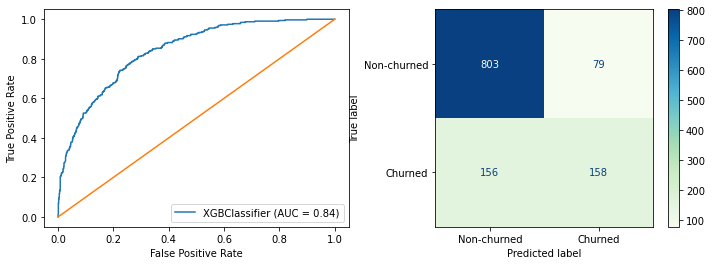

In [69]:
# Модель XGBClassifier, построенная на датасете, полученном при помощи функции get_dummies

model_fit_predict(models['xgb'], best_params2['xgb'], X2_train, y2_train, X2_test, y2_test)

**Как можно увидеть из представленных выше значений precision, recall, f1-score, качество моделей почти одинаковое** 

**Наилучшее качество показала модель XGBClassifier с датасетом, полученном при помощи функции get_dummies**